In [4]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found

Base.classes.keys()

# inspector = inspect(engine)
# inspector.get_table_names()

['measurement', 'station']

In [11]:
# Something might go here later

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
result = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

# result_prcp = [res[1] for res in result[::]]
# result_date = [res[0] for res in result[::]]

In [15]:
# I used this code to look through the dates and columns

# df = pd.DataFrame(result[::], columns = ['date', 'prcp'])
# df = df.set_index('date')
# clean = df.dropna(axis=0)

In [16]:
# Calculate the date 1 year ago from the last data point in the database
import datetime as dt


last_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(f"Flipping the dataset to decending order tells us the latest date in the database is {last_date}.")

Flipping the dataset to decending order tells us the latest date in the database is ('2017-08-23',).


In [17]:
# This code takes the latest date and subtracts a year to give us the date for one year prior

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(f"One year ago was {year_ago}.")

One year ago was 2016-08-23.


In [18]:
# Perform a query to retrieve the data and precipitation scores

annual_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

df = pd.DataFrame(annual_precipitation[::], columns = ['date', 'prcp'])
df = df.set_index('date')
clean = df.dropna(axis=0)
clean

# vacation_start = session.query(Measurement.date).\
#     filter(Measurement.date == '2016-08-23')

# vacation_end = session.query(Measurment).\
#      filter(measurement.date == '2016-08-30')

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [19]:
# This is the code to plot the data

# clean.plot.bar(title = 'Precipitation by Date')
# plt.tight_layout()
# plt.show()

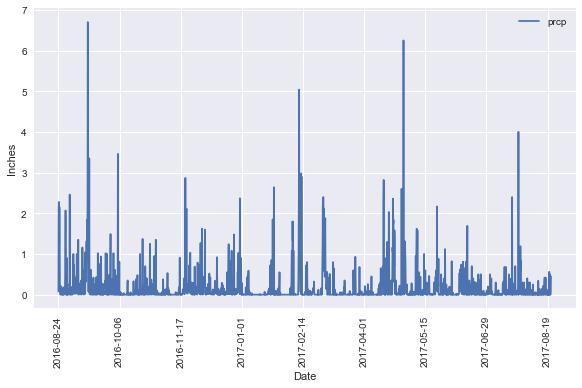

In [20]:
clean.plot(rot=90)
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

clean.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
sstations_available = session.query(Station.station).count()
sstations_available

9

In [23]:
mstations_available = session.query(Measurement.station).count()
mstations_available

19550

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [25]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [27]:
session.query(Measurement.station, Station.station).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [28]:
# Did a join to find common columns 

all_stations = session.query(Measurement, Station).filter(Measurement.station == Station.station).all()

In [29]:
session.query(func.min(Measurement.station)).all()

[('USC00511918')]

In [36]:
# List the stations and the counts in descending order.
# Which station has the highest number of observations?

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded
# highest temperature recorded, and average temperature of the most active station?

sel = [Measurement.station,
       func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

station_data = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
station_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

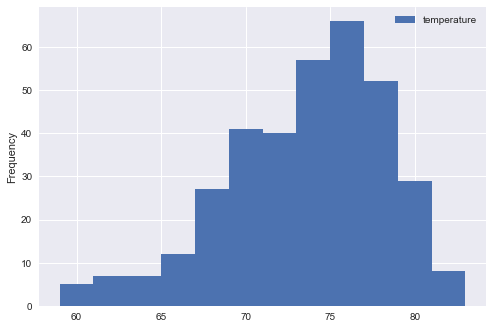

In [43]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# 2016-08-24

annual_observation = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-24').all()
annual_obs_data = pd.DataFrame(annual_observation, columns = ['temperature'])
annual_obs_data.plot.hist(bins=12)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
